Questions to Answer
1) Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

2) Do movies that are longer earn more revenue than movies that are shorter?

3) Do some movie genres earn more revenue than others? 
- They want you to perform a statistical test to get a mathematically-supported answer.
- They want you to report if you found a significant difference between ratings.
- If so, what was the p-value of you analysis?
- And which rating earns the most revenue?
- They want you to prepare a visualization that supports your finding.

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import os
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'genres_.csv.gz',
 'Project 3-EDA-TMDB.ipynb',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_genres.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_requests_2002.json',
 'tmdb_api_requests_2003.json',
 'tmdb_api_requests_2004.json',
 'tmdb_api_requests_2005.json',
 '

In [3]:
import glob
search = FOLDER+"/**/final*.csv.gz"
print(search)
file_list = sorted(glob.glob(search,recursive=True))
file_list

Data//**/final*.csv.gz


['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz']

In [4]:
import pandas as pd
df_list = []

for file in file_list:
    df = pd.read_csv(file)
    df_list.append(df)


In [5]:
df = pd.concat(df_list)
df.reset_index(inplace=True,drop=True)
df.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN


In [6]:
## Drop columns that are irrelevant
drop_cols = ['backdrop_path','belongs_to_collection','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language','adult']

## drop columns
df = df.drop(columns=drop_cols)
df.head(3)

,imdb_id,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.397,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN
2,tt0113092,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.755,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN


In [7]:
# remove ids that are 0  and then reset index
df = df[df['imdb_id'] != '0']
df.head(3)

,imdb_id,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
1,tt0113026,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.397,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN
2,tt0113092,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.755,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN
3,tt0116391,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.600,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN


# Hypothesis Testing #1: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

- Null Hypothesis: There is no statistical difference between the MPAA rating and revenue generated.(Revenue generated from the movies is the same regardless of the MPAA rating.

- Alternate Hypothesis: There is a statistical difference between the MPAA rating and revenue generated.

Type of Test: ANOVA Test.
Since the certification column: comprises of more than 2(different groups).

In [8]:
# Exploring the certification column
df['certification'].value_counts(dropna=False)

NaN                                47663
R                                   6125
NR                                  3423
PG-13                               3260
PG                                  1488
G                                    474
NC-17                                157
Unrated                                5
-                                      1
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
R                                      1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [9]:
df['certification'].unique()

array([nan, 'PG', 'R', 'G', 'NR', 'PG-13', 'NC-17', 'Unrated', '-', 'UR',
       'Not Rated', 'ScreamFest Horror Film Festival', 'R ', 'PG-13 ',
       '10'], dtype=object)

In [10]:
### fix certification col: By removing extra space and compiling miscellaneous
df['certification'] = df['certification'].str.strip()

repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':np.nan}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts()

R        6126
NR       3431
PG-13    3261
PG       1488
G         474
NC-17     157
Name: certification, dtype: int64

In [11]:
not_na_cert = df['certification'].notna()
df[not_na_cert].head(4)

,imdb_id,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
4,tt0118694,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",16.399,2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1867.0,PG
5,tt0118852,0.0,"[{'id': 18, 'name': 'Drama'}]",5.051,2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R
6,tt0119273,15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",12.233,2000-04-19,0.0,88.0,Heavy Metal 2000,6.1,149.0,R
7,tt0119495,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",0.600,2000-08-24,0.0,86.0,Love 101,0.0,0.0,R


In [12]:
# comb = df.loc[df[not_na_mask] & df[hig_rev]]
# df[comb]

ANOVA Test Assumption
- Normality
- Equal variance
- No significant outliers

In [13]:
groups = {}
for certification in df[not_na_cert]['certification'].unique():
    review_data = df[not_na_cert].loc[df[not_na_cert]['certification']==certification,'revenue'].copy()
    groups[certification] = review_data
groups.keys()

dict_keys(['PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

In [14]:
#Test for Outliers

for certification, review_data in groups.items():
    # Calculate the number of outliers
    outliers = np.abs(stats.zscore(review_data)) > 3
    print(f"{outliers.sum()} outliers are in the {certification} group.")

41 outliers are in the PG group.
121 outliers are in the R group.
11 outliers are in the G group.
27 outliers are in the NR group.
88 outliers are in the PG-13 group.
2 outliers are in the NC-17 group.


In [15]:
    # Remove the outliers
review_data = review_data.loc[~outliers]
review_data

507       0.0
625       0.0
972       0.0
1250      0.0
2679      0.0
         ... 
61487     0.0
61630     0.0
61705    50.0
61902     0.0
62134     0.0
Name: revenue, Length: 155, dtype: float64

In [16]:
# 1. Test for Normality
norm_results = {}
for certification, review_data in groups.items():
#n:size of group, p is p value
    stat, p = stats.normaltest(review_data)
    norm_results[certification] = {'n': len(review_data),
                       'p':p}

In [17]:
#Converting the results to a dataframe
norm_results_df= pd.DataFrame(norm_results).T
norm_results_df 

,n,p
PG,1488.0,1.092566e-284
R,6126.0,0.000000e+00
G,474.0,5.151997e-123
NR,3431.0,0.000000e+00
PG-13,3261.0,0.000000e+00
NC-17,157.0,1.289786e-59


In [18]:
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,sig
PG,1488.0,1.092566e-284,True
R,6126.0,0.000000e+00,True
G,474.0,5.151997e-123,True
NR,3431.0,0.000000e+00,True
PG-13,3261.0,0.000000e+00,True
NC-17,157.0,1.289786e-59,True


- Since each group has large dataset, it is safe to ignore the normality 
distribution assumption

In [19]:
#Testing Assumption of Equal Variance
stats.levene(*groups.values())

LeveneResult(statistic=181.7535512005074, pvalue=1.8258319158029267e-188)

The p-value <0.05 this indicates unequal variance. Thus we reject the null hypothesis: 
That the groups are of equal variance.Hence the Kruskal-Wallis will be ran.

In [20]:
stats.kruskal(*groups.values())

KruskalResult(statistic=1901.557597820038, pvalue=0.0)

Since p >0.05, It is clear that there is a significant difference between the different ratings and revenue generating. This indicates that MPAA rating of a movie (G/PG/PG-13/R) affects how much revenue the movie generates

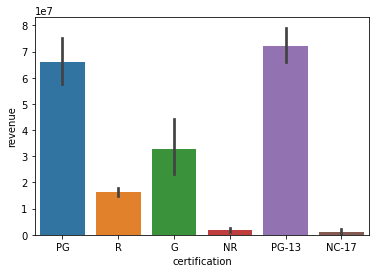

In [21]:
sns.barplot(data=df, x=df[not_na_cert]['certification'], y='revenue');

Visualization Interpretation 
- The PG , PG-13 generate more revenue than the rest. with PG-13 being the highest revenue generating movies
- NR and NC-17 generate the least revenue

# Hypothesis Testing #2:-Do Movies that are longer earn more revenue that shorter ones

- Null Hypothesis: There is no statistical difference between the runtime and revenue generated

- Alternate Hypothesis: There is a statistical difference between the runtime and revenue generated

Data types: Numerical and categorical
Test: 2- Sample  T-test
Assumptions: Normality, Outliers, Equal Variance

In [22]:
df.head(3)

,imdb_id,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
1,tt0113026,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.397,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN
2,tt0113092,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.755,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN
3,tt0116391,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.600,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN


In [23]:
#Split data into two groups
longer_time = df.loc[df['runtime'] > 150].copy()
shorter_time = df.loc[df['runtime'] < 150].copy()

In [24]:
#Label the two groups
longer_time['runtime'] = 'long'
shorter_time['runtime'] = 'short'

In [25]:
comb_df = pd.concat([longer_time, shorter_time]).copy()

In [ ]:
#Dropping columns where revenue is zero
comb_df.drop(comb_df[comb_df['revenue'] == 0.0].index, inplace = True)

In [27]:
#Display only columns of interest
rev_time = comb_df[["revenue", "runtime"]]
rev_time

,revenue,runtime
65,15000000.0,long
167,465361176.0,long
254,215294342.0,long
617,4900000.0,long
821,500000.0,long
...,...,...
62580,8756.0,short
62588,6416063.0,short
62600,19002036.0,short
62601,44888959.0,short


In [28]:
longer_rev = longer_time['revenue']
shorter_rev = shorter_time['revenue']

In [29]:
# Check for outliers
zscores= stats.zscore(longer_rev)
outliers_long = abs(zscores)>3
np.sum(outliers_long)
print(f"{outliers_long.sum()} outliers are in the {len(longer_rev)} longer movies group.")

25 outliers are in the 1106 longer movies group.


In [30]:
longer_rev= longer_rev.loc[~outliers_long]
longer_rev

3                0.0
47               0.0
65        15000000.0
167      465361176.0
220              0.0
            ...     
62501            0.0
62524            0.0
62535            0.0
62542            0.0
62603            0.0
Name: revenue, Length: 1081, dtype: float64

In [31]:
# Check for outliers
zscores= stats.zscore(shorter_rev)
outliers_short = abs(zscores)>3
np.sum(outliers_short)
print(f"{outliers_short.sum()} outliers are in the {len(shorter_rev)} shorter movies group.")

698 outliers are in the 60322 shorter movies group.


In [32]:
#Remove outliers
shorter_rev= shorter_rev.loc[~outliers_short]
shorter_rev

1               0.0
2               0.0
4        12854953.0
5               0.0
6               0.0
            ...    
62619           0.0
62620           0.0
62621           0.0
62622           0.0
62623     4588389.0
Name: revenue, Length: 59624, dtype: float64

- Test for Normality

In [33]:
result_longer = stats.normaltest(longer_rev)
result_longer

NormaltestResult(statistic=1225.7610331495905, pvalue=6.75108514789691e-267)

In [34]:
result_shorter = stats.normaltest(shorter_rev)
result_shorter

NormaltestResult(statistic=75305.21453240325, pvalue=0.0)

- Test of Equal Variance(Levene's Test)

In [35]:
result = stats.levene(longer_rev, shorter_rev)
result

LeveneResult(statistic=538.2071811241339, pvalue=1.5220537216807393e-118)

- The results showed unequal variance: Hence an alternate test  Welch's Test will be run

- Alternative Unequal Variance Test

In [36]:
result2 = stats.ttest_ind(longer_rev, shorter_rev, equal_var = False)
result2

Ttest_indResult(statistic=6.465409992156868, pvalue=1.5257049084406301e-10)

In [37]:
from scipy import stats
stats.mannwhitneyu(longer_rev, shorter_rev)

MannwhitneyuResult(statistic=36362301.0, pvalue=2.6405365353209805e-40)

- The p-value<0.05 thus we reject the null hypothesis as it is evident there is a statistical difference between the runtime of the movies and revenue generated. {The longer movies generated more revenue compared to shorter movies}

In [38]:
s_mean = shorter_rev.mean()
print(f'the shorter movies revenue mean is:{s_mean}')
l_mean = longer_rev.mean()
print(f'the longer movies revenue mean is:{l_mean}')

the shorter movies revenue mean is:2735782.9985576277
the longer movies revenue mean is:14750840.046253469


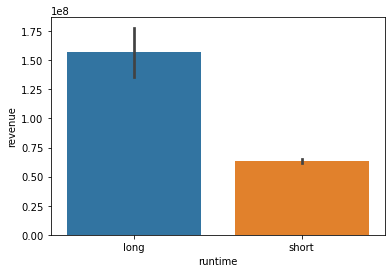

In [39]:
sns.barplot(data=comb_df, x='runtime', y='revenue', ci=68.2);

-From the Visualization it is clear the longer movies generated more revenue compared to shorter movies

#  Do movies released in 2020 earn less revenue than movies released in 2018?
- How do the years compare for movie ratings?

- Null Hypothesis: There is no statistical difference between the year released and revenue generated

- Alternate Hypothesis: There is a statistical difference between the year released and revenue generated

- Hypothesis Test

Data types: two groups, both numerical data

Test: 2-Sample T-test

Test Assumptions: Normality, Equal Variance and Outliers

In [76]:
df.head()

,imdb_id,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
1,tt0113026,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.397,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN
2,tt0113092,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.755,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN
3,tt0116391,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.600,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN
4,tt0118694,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",16.399,2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1867.0,PG
5,tt0118852,0.0,"[{'id': 18, 'name': 'Drama'}]",5.051,2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62602 entries, 1 to 62623
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        62602 non-null  object 
 1   budget         62602 non-null  float64
 2   genres         62602 non-null  object 
 3   popularity     62602 non-null  float64
 4   release_date   61402 non-null  object 
 5   revenue        62602 non-null  float64
 6   runtime        61556 non-null  float64
 7   title          62602 non-null  object 
 8   vote_average   62602 non-null  float64
 9   vote_count     62602 non-null  float64
 10  certification  14937 non-null  object 
dtypes: float64(6), object(5)
memory usage: 7.7+ MB


In [78]:
df['release_date']
df['release_date'].str.split('-', expand=True)

,0,1,2
1,2000,09,22
2,2000,11,15
3,2000,04,14
4,2000,09,29
5,2000,09,02
...,...,...,...
62619,2021,09,08
62620,2021,11,19
62621,2022,01,21
62622,2021,12,07


In [103]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head(5)

,imdb_id,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,year,month,day
1,tt0113026,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.397,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,2000.0,9.0,22.0
2,tt0113092,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.755,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN,2000.0,11.0,15.0
3,tt0116391,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.600,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN,2000.0,4.0,14.0
4,tt0118694,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",16.399,2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1867.0,PG,2000.0,9.0,29.0
5,tt0118852,0.0,"[{'id': 18, 'name': 'Drama'}]",5.051,2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R,2000.0,9.0,2.0


In [80]:
 #Split data into two groups
year_2020 = df.loc[df['year'] == 2020.0].copy()
year_2018= df.loc[df['year'] == 2018.0].copy()

In [82]:
year_df = pd.concat([year_2020, year_2018]).copy()
year_df.head(5)

,imdb_id,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,year,month,day
11772,tt1093869,0.0,[],0.600,2020-12-12,0.0,0.0,"White Lies, Black Sheep",0.0,0.0,NaN,2020.0,12.0,12.0
15963,tt1441950,0.0,"[{'id': 18, 'name': 'Drama'}]",1.790,2020-04-28,0.0,90.0,Pressure,10.0,1.0,NaN,2020.0,4.0,28.0
18599,tt1628038,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2020-02-21,0.0,76.0,Eden Burning,0.0,0.0,NaN,2020.0,2.0,21.0
30126,tt3112954,0.0,"[{'id': 18, 'name': 'Drama'}]",1.635,2020-10-01,0.0,0.0,Come Follow Me,7.0,1.0,NaN,2020.0,10.0,1.0
33541,tt3763854,0.0,"[{'id': 27, 'name': 'Horror'}]",0.840,2020-07-07,0.0,105.0,Devil's Point,0.0,0.0,NaN,2020.0,7.0,7.0


In [83]:
#Dropping columns where revenue is zero
year_df.drop(year_df[year_df['revenue'] == 0.0].index, inplace = True)

In [84]:
#Display only columns of interest
year_time = year_df[["revenue", "year"]]
year_time

,revenue,year
47150,548608.0,2020.0
48242,26563.0,2020.0
50721,3364426.0,2020.0
51004,273639.0,2020.0
51525,742476.0,2020.0
...,...,...
50705,82446.0,2018.0
53016,140000.0,2018.0
54808,1892516.0,2018.0
57715,3.0,2018.0


In [87]:
year_recent = year_time.loc[year_time['year'] == 2020.0].copy()
year_past = year_time.loc[year_time['year'] == 2018.0].copy()

In [89]:
recent_rev = year_recent['revenue']
past_rev = year_past['revenue']

In [91]:
# Check for outliers
zscores= stats.zscore(recent_rev)
outliers_recent = abs(zscores)>3
np.sum(outliers_recent)
print(f"{outliers_recent.sum()} outliers are in the {len(recent_rev)}- recent 2020 movies group.")

7 outliers are in the 237- recent 2020 movies group.


In [93]:
#Remove outliers
recent_rev= recent_rev.loc[~outliers_recent]
recent_rev

47150      548608.0
48242       26563.0
50721     3364426.0
51004      273639.0
51525      742476.0
            ...    
59059      225374.0
59066       39328.0
59073     6700000.0
59086    11136444.0
59094      236880.0
Name: revenue, Length: 230, dtype: float64

In [92]:
# Check for outliers
zscores= stats.zscore(past_rev)
outliers_past = abs(zscores)>3
np.sum(outliers_past)
print(f"{outliers_past.sum()} outliers are in the {len(past_rev)}- recent 2018 movies group.")

9 outliers are in the 406- recent 2018 movies group.


In [94]:
#Remove outliers
past_rev= past_rev.loc[~outliers_past]
past_rev

41895       10832.0
41989     3335913.0
42192    10615000.0
42338          24.0
42418      231719.0
            ...    
50705       82446.0
53016      140000.0
54808     1892516.0
57715           3.0
57893    21000000.0
Name: revenue, Length: 397, dtype: float64

In [95]:
#Test for Normality
result_recent = stats.normaltest(recent_rev)
result_recent

NormaltestResult(statistic=234.0050759817616, pvalue=1.5361845109315593e-51)

In [96]:
#Test for Normality
result_past = stats.normaltest(past_rev)
result_past

NormaltestResult(statistic=292.3084501507757, pvalue=3.3575813425194265e-64)

- Since the two groups are greater than 15, we can ignore this assumption

In [97]:
#Levene's Test [Equal Variance]
result = stats.levene(recent_rev, past_rev)
result

LeveneResult(statistic=27.00905549920521, pvalue=2.745848699251276e-07)

Since p-value < 0.05 , this indicates that the two groups have unequal variance

In [98]:
# Welch's Test
result2 = stats.ttest_ind(recent_rev, past_rev, equal_var = False)
result2

Ttest_indResult(statistic=-6.691023411811288, pvalue=6.188600307359937e-11)

In [100]:
# Mann-Whitney U test
stats.mannwhitneyu(recent_rev, past_rev)

MannwhitneyuResult(statistic=32295.0, pvalue=9.874040868977083e-10)

- Since p value < 0.05, In the test for the assumption and the Mann-Whitney U Test Hence we can reject the null hypothesis and support the alternative hypothesis that there is a significance difference the years of the movies and revenue generated

# Visualization of Comparison of Revenue Earned - 2020 VS 2018 Movies

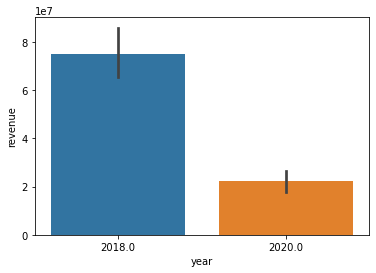

In [102]:
sns.barplot(data=year_df, x='year', y='revenue', ci=68.2);

In [101]:
r_mean = recent_rev.mean()
print(f'the 2020-recent movies revenue mean is:{r_mean}')
p_mean = past_rev.mean()
print(f'the 2018-past movies revenue mean is:{p_mean}')

the 2020-recent movies revenue mean is:11713115.93478261
the 2018-past movies revenue mean is:50530394.02770781


- From the Visualization: It is clear that 2018 movies earn more revenue than the 2020 movies, as also reflected on the revenue means